# *** Customer Segmentation for E-Commerce***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display, Markdown
from matplotlib import gridspec


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)


In [3]:
data = data.dropna(subset=['CustomerID'])
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
current_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [5]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


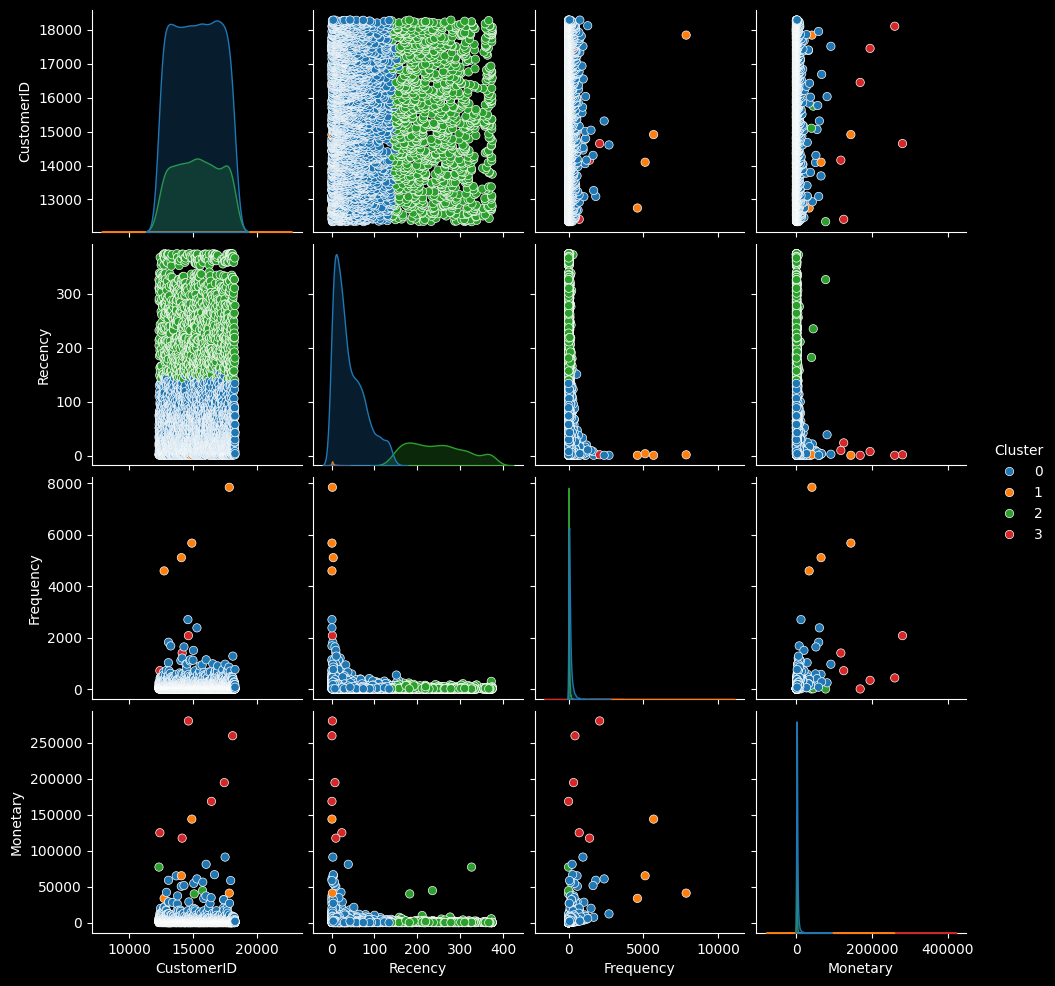

In [9]:
plt.style.use('dark_background')
sns.pairplot(rfm, hue='Cluster', palette='tab10')
plt.show()

In [10]:
def apply_kmeans(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
    return rfm


In [12]:
# Dark theme for plots
plt.style.use('dark_background')

# Scatter plot function
def plot_clusters_neon(ax1, rfm):
    sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', palette='cool', data=rfm, s=100, edgecolor='white', linewidth=1, ax=ax1)
    ax1.set_title('Customer Segments by Recency and Frequency', fontsize=14, color='cyan', weight='bold')
    ax1.set_xlabel('Recency', fontsize=12, color='lime')
    ax1.set_ylabel('Frequency', fontsize=12, color='lime')
    ax1.grid(True, linestyle='--', alpha=0.3, color='lightblue')

In [13]:
# Radar chart function
def plot_radar_neon(ax2, rfm, k):
    radar_data = rfm.groupby('Cluster').mean()[['Recency', 'Frequency', 'Monetary']].reset_index()
    categories = ['Recency', 'Frequency', 'Monetary']

    for i in range(k):
        values = radar_data.iloc[i][['Recency', 'Frequency', 'Monetary']].values.flatten().tolist()
        values += values[:1]  # Repeat the first value to close the circle
        angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
        angles += angles[:1]

        color = np.random.rand(3,)
        ax2.fill(angles, values, color=color, alpha=0.2, linewidth=2)
        ax2.plot(angles, values, color=color, linewidth=2, label=f'Cluster {i+1}')

    ax2.set_yticklabels([])
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(categories, color='cyan')
    ax2.legend(loc='upper right', fontsize=10, facecolor='black', edgecolor='white')
    ax2.set_title("Radar Chart of Customer Segments", fontsize=14, color='cyan', weight='bold')


In [8]:
def plot_both(rfm, k):
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1], polar=True)

    plot_clusters_neon(ax1, rfm)
    plot_radar_neon(ax2, rfm, k)
    plt.tight_layout()
    plt.show()


In [14]:

# Create a function to display both charts side by side
def plot_both(rfm, k):
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1], polar=True)

    plot_clusters_neon(ax1, rfm)
    plot_radar_neon(ax2, rfm, k)

    plt.tight_layout()
    plt.show()

In [15]:
# Create interactive slider for number of clusters
cluster_slider = widgets.IntSlider(value=4, min=2, max=10, step=1, description='Clusters:',
                                   style={'description_width': 'initial'},
                                   layout=widgets.Layout(width='100%', height='80px'),
                                   continuous_update=False)


In [16]:
# Update function for the plots
def update_plots(k):
    rfm_with_clusters = apply_kmeans(k)
    plot_both(rfm_with_clusters, k)


In [17]:
# Display project header
header = Markdown("""
# **Customer Segmentation Dashboard**
## K-Means Clustering for E-Commerce
""")

# Display project footer
footer = Markdown("""
---
**Created by AI Innovators**
""")

# Bordered box layout for GUI
border_box = widgets.HTML(
    value="""
    <style>
        .custom-box {
            border: 3px solid #00ff00;
            padding: 15px;
            border-radius: 10px;
            background-color: #333;
        }
        .custom-header {
            font-size: 24px;
            color: cyan;
            text-align: center;
            margin-bottom: 10px;
        }
        .custom-footer {
            font-size: 14px;
            color: lime;
            text-align: center;
            margin-top: 10px;
        }
        .custom-slider {
            margin-top: 20px;
        }
    </style>
    <div class="custom-box">
        <div class="custom-header">
            Customer Segmentation Dashboard <br> K-Means Clustering for E-Commerce
        </div>
        <div class="custom-slider">
            <!-- Widgets will be inserted here dynamically -->
        </div>
        <div class="custom-footer">
            Created by AI Innovators
        </div>
    </div>
    """
)

In [18]:
# Remove the unnecessary code label
from IPython.core.display import Javascript
display(Javascript('IPython.notebook.kernel.execute("remove_output=True")'))

# Display the border box and attach interactive widgets
display(border_box)
widgets.interact(update_plots, k=cluster_slider)

<IPython.core.display.Javascript object>

HTML(value='\n    <style>\n        .custom-box {\n            border: 3px solid #00ff00;\n            padding:…

interactive(children=(IntSlider(value=4, continuous_update=False, description='Clusters:', layout=Layout(heigh…

<function __main__.update_plots(k)>

# **HAPPY COADING**